#CLASSIFICATION

In [ ]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import  classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from time import process_time
import os

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data processsing and Data split

In [ ]:
def generate_model_report(y_test, y_pred):
    print(classification_report(y_test, y_pred))

In [ ]:
target = 'ArrDel15'
ds = pd.read_csv('/content/drive/My Drive/finaldata.csv')
features = ['Quarter', 'Month', 'DayofMonth','Origin',  'Dest', 'CRSDepTime',
            'DepTime', 'DepDelayMinutes', 'windspeedKmph', 'DewPointF', 'cloudcover',
            'precipMM', 'pressure', 'WindGustKmph', 'visibility', 'weatherCode', 'tempF',
            'WindChillF', 'winddirDegree', 'humidity', 'ArrDel15']
ds = ds.loc[: , features  ]
ds.dropna(inplace = True)

In [ ]:
X = ds.drop(target, axis = 1)
X['Origin'] = LabelEncoder().fit_transform(X['Origin'])
X['Dest'] = LabelEncoder().fit_transform(X['Dest'])
y = ds[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

NameError: ignored

In [ ]:
X_test[0]

array([ 0.43874662,  0.42842059, -1.68049286, -0.49627573,  0.40885022,
       -0.0301369 , -0.05061675, -0.33904372,  0.10225356,  1.27791438,
       -0.29348574, -0.16011233, -0.18090787, -0.18496849,  0.30950055,
       -0.47348545,  1.55427002,  1.47192771, -1.1734422 , -0.68082526])

Logistic Regression

In [ ]:
# def logistic(X_train, y_train):
    # print('logistic')
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# generate_model_report(y_test, y_pred)


NameError: ignored

In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
import joblib
joblib.dump(value=classifier, filename='./sample_data/sklearn_flight_model.pkl')

['./sample_data/sklearn_flight_model.pkl']

Decision Tree

In [ ]:
def decision_tree(X_train, y_train): 
    print('decision_tree')
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    generate_model_report(y_test, y_pred)

Random Forest Classifier

In [ ]:
def RandomForest(X_train, y_train): 
    print('Random_Forest_classifier')
    classifier = RandomForestClassifier(n_estimators = 100)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    generate_model_report(y_test, y_pred)

Extra Tree

In [ ]:
def extra_tree(X_train, y_train):
    print('extra_tree')
    X, y = make_classification(n_features = 22, random_state=0)
    classifier = ExtraTreesClassifier(n_estimators = 100 , random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    generate_model_report(y_test, y_pred)

Xgboost

In [ ]:
def xgboost(X_train, y_train):    
    print('xgboost')
    X, y = make_classification(random_state=0)
    classifier = GradientBoostingClassifier(random_state=0)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    generate_model_report(y_test, y_pred)

under sampling

In [ ]:
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X_train_under, y_train_under = nr.fit_sample(X_train, y_train.ravel()) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


over sampling

In [ ]:
sm = SMOTE(random_state = 42) 
X_train_over, y_train_over = sm.fit_resample(X_train, y_train) 


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


classification function

In [ ]:
def classification(X_value,y_value):
    logistic(X_value, y_value)
    decision_tree(X_value, y_value)
    RandomForest(X_value, y_value) 
    # extra_tree(X_value, y_value)
    xgboost(X_value, y_value)
    

main function

In [ ]:

print('GENERAL')
classification(X_train, y_train)
print('\n\nUNDERSAMPLING')
classification(X_train_under, y_train_under)
print('\n\nOVERRSAMPLING')
classification(X_train_over, y_train_over)


GENERAL
logistic
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    292543
         1.0       0.89      0.68      0.77     77745

    accuracy                           0.92    370288
   macro avg       0.91      0.83      0.86    370288
weighted avg       0.91      0.92      0.91    370288

decision_tree
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92    292543
         1.0       0.69      0.70      0.70     77745

    accuracy                           0.87    370288
   macro avg       0.81      0.81      0.81    370288
weighted avg       0.87      0.87      0.87    370288

Random_Forest_classifier
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95    292543
         1.0       0.88      0.70      0.78     77745

    accuracy                           0.92    370288
   macro avg       0.90      0.84      0.86    370288
weighted avg      

In [ ]:
len(ds[ds['ArrDel15'] == 0])

1463378

In [ ]:
len(ds[ds['ArrDel15'] == 1])

388058

In [ ]:
ds = pd.read_csv('/content/drive/My Drive/flight project /finaldata.csv')

In [ ]:
dq = ds.copy()

In [ ]:
dq.dropna(inplace = True)

In [ ]:
dq.drop(dq[dq['ArrDel15'] == 0].index, inplace = True)

In [ ]:
import matplotlib.pyplot as mlp
import pandas as pd

[Text(0, 0.5, 'No of elements (millions)'),
 Text(0.5, 0, 'Arrival delay in minutes')]

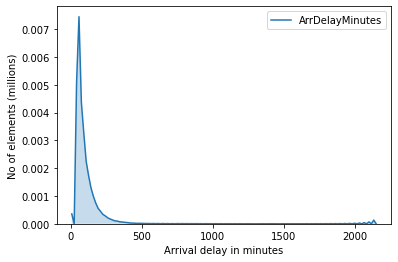

In [ ]:
import seaborn as sls
graph = sls.kdeplot(dq['ArrDelayMinutes'],shade = True)
# sls.xlabel("SDASd")
graph.set(xlabel="Arrival delay in minutes", ylabel = "No of elements (millions)")

In [ ]:
Numeric_df = pd.DataFrame(X)
Numeric_df['Y'] = y
corr= Numeric_df.corr()
corr_y = abs(corr["Y"])
highest_corr = corr_y[corr_y >0.02]
highest_corr.sort_values(ascending=True)

Origin             0.020774
visibility         0.022062
Quarter            0.022705
Month              0.023326
WindChillF         0.031942
tempF              0.035366
cloudcover         0.038021
DewPointF          0.038138
Dest               0.051241
pressure           0.073864
WindGustKmph       0.080601
windspeedKmph      0.085412
precipMM           0.088619
weatherCode        0.092865
CRSDepTime         0.127236
DepTime            0.154321
DepDelayMinutes    0.546150
Y                  1.000000
Name: Y, dtype: float64

In [ ]:
from matplotlib.pyplot import figure
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


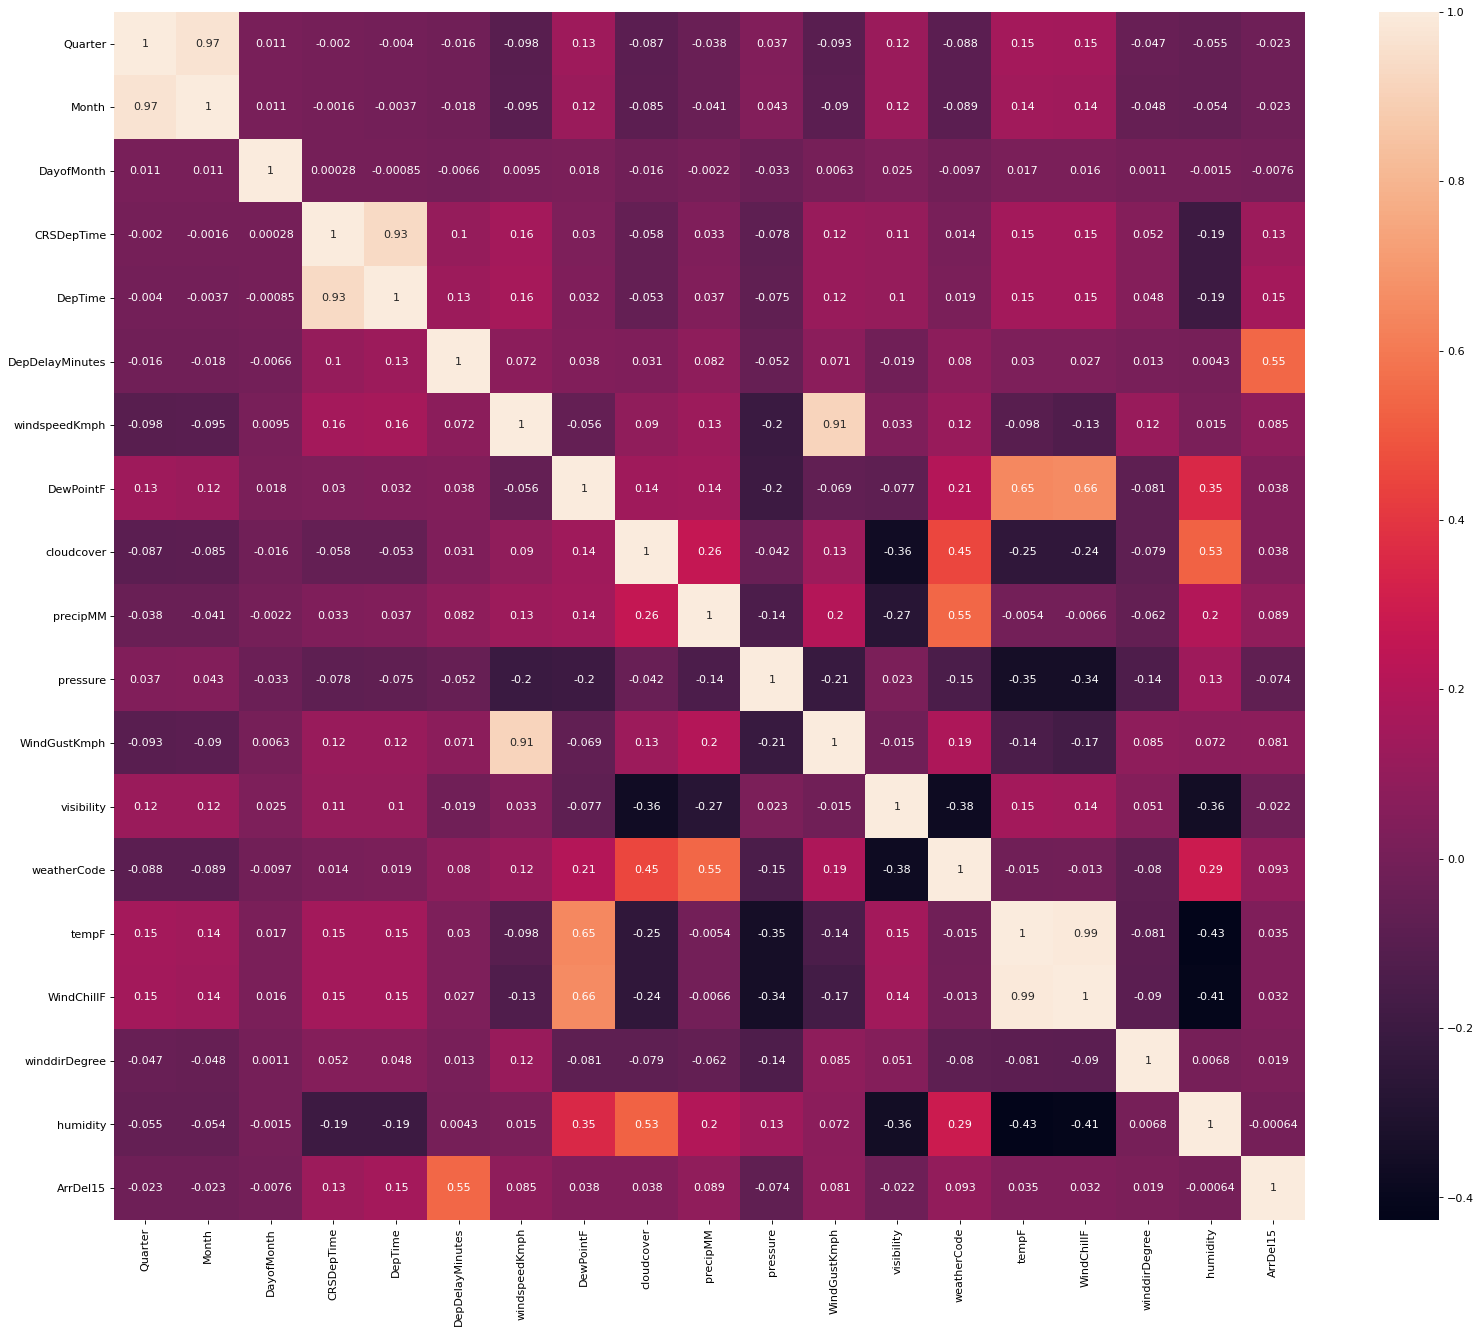

In [ ]:
figure(num=None, figsize=(24, 20), dpi=80, facecolor='w', edgecolor='k')

corr2 = ds.corr()

sns.heatmap(corr2, annot=True, fmt=".2g")

In [ ]:
highest_corr.corr()

TypeError: ignored

In [ ]:
Numeric_df.columns

Index(['Quarter', 'Month', 'DayofMonth', 'Origin', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'windspeedKmph', 'DewPointF',
       'cloudcover', 'precipMM', 'pressure', 'WindGustKmph', 'visibility',
       'weatherCode', 'tempF', 'WindChillF', 'winddirDegree', 'humidity', 'Y'],
      dtype='object')

In [ ]:
ds

,Quarter,Month,DayofMonth,Origin,Dest,CRSDepTime,DepTime,DepDelayMinutes,windspeedKmph,DewPointF,cloudcover,precipMM,pressure,WindGustKmph,visibility,weatherCode,tempF,WindChillF,winddirDegree,humidity,ArrDel15
0,2,6,26,DFW,EWR,949,946.0,0.0,11,67,57,0.0,1021,13,10,176,76,78,111,68,0.0
1,2,6,26,DFW,ORD,1015,1006.0,0.0,11,67,57,0.0,1021,13,10,176,76,78,111,68,0.0
2,2,6,26,DFW,IAH,930,924.0,0.0,11,67,57,0.0,1021,13,10,176,76,78,111,68,0.0
3,2,6,26,DFW,LAS,1003,1001.0,0.0,11,67,57,0.0,1021,13,10,176,76,78,111,68,0.0
4,2,6,26,DFW,ATL,954,1005.0,11.0,11,67,57,0.0,1021,13,10,176,76,78,111,68,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877291,2,4,1,ORD,SEA,2235,2221.0,0.0,18,35,33,0.1,1010,29,8,113,41,34,285,80,0.0
1877292,2,4,1,ORD,DEN,2255,2248.0,0.0,18,35,33,0.1,1010,29,8,113,41,34,285,80,0.0
1877293,2,4,1,EWR,ORD,2220,2353.0,93.0,19,56,94,0.0,1002,31,10,122,69,69,247,64,1.0
1877294,2,4,4,EWR,ORD,2305,2316.0,11.0,22,26,100,0.2,1017,28,9,122,35,27,201,71,0.0


In [ ]:
target = 'ArrDel15'
ds = pd.read_csv('/content/drive/My Drive/flight project /finaldata.csv')
ds.dropna(inplace = True)
check = ds[ds['ArrDel15'] == 1]

In [ ]:
check['ArrDelayMinutes']

8           19.0
18          94.0
21          33.0
25          51.0
26          25.0
           ...  
1877280     21.0
1877281     32.0
1877282    255.0
1877283     23.0
1877293     74.0
Name: ArrDelayMinutes, Length: 388058, dtype: float64

In [ ]:
np.mean(check['ArrDelayMinutes'])

62.833042998726995

In [ ]:
np.average(check['ArrDelayMinutes'])


62.833042998726995